# Quickstart

This notebook describes a minimal example. First, create `daskperiment.Experiment` instance. This instance controlls an experiment, a chain of functions to output value and a collection of input variables.

In [1]:
%matplotlib inline
import numpy as np
import daskperiment

First, create `daskperiment.Experiment` instance. This instance controlls an experiment, a chain of functions to output value and a collection of input variables.

In [2]:
ex = daskperiment.Experiment(id='quickstart_pj')
ex

2019-02-05 23:54:32,777 [daskperiment.io.pickle] [INFO] Creating new cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/quickstart_pj
2019-02-05 23:54:32,786 [daskperiment.core.experiment] [INFO] Initialized new experiment: Experiment(id: quickstart_pj, trial_id: 0, backend: LocalBackend('daskperiment_cache/quickstart_pj'))
2019-02-05 23:54:33,185 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-02-05 23:54:33,186 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (Jupyter Notebook)
2019-02-05 23:54:33,188 [daskperiment.core.environment] [INFO] daskperiment version: 0.2.1.dev0
2019-02-05 23:54:33,190 [daskperiment.core.environment] [INFO] daskperiment path: /Users/sinhrks/Git/daskperiment/daskperiment
2019-02-05 23:54:33,192 [daskperiment.core.environment] [INFO] Working directory: /Users/sinhrks/Git/daskperiment/notebook
2019-02-05 23:54:33,194 [daskperiment.core.environment] [INFO] Number of installed Python pac

Experiment(id: quickstart_pj, trial_id: 0, backend: LocalBackend('daskperiment_cache/quickstart_pj'))

Then, use `Experiment.parameter` method to define parameters (input variables for the experiment). The actual value of each parameter can be changed in every trial.

In [3]:
a = ex.parameter('a')
b = ex.parameter('b')
a

Parameter(a: Undefined)

Next, you can define each experiment step (function) by decorating with `Experiment` instance (`@ex`).

Note that the function to output the final result (mostly objective value to be minimized or maximized) must be decorated with `Experiment.result`. The chain of these functions are expressed as `Dask.Delayed` instance.

In [4]:
@ex
def prepare_data(a, b):
    return a + b 

@ex.result
def calculate_score(s):
    return 10 / s

d = prepare_data(a, b)
s = calculate_score(d)
s

Delayed('calculate_score-d22eef69-9849-455c-8df2-19de504f3bea')

Thus, you can visualize computation graph via `.visualize` method.

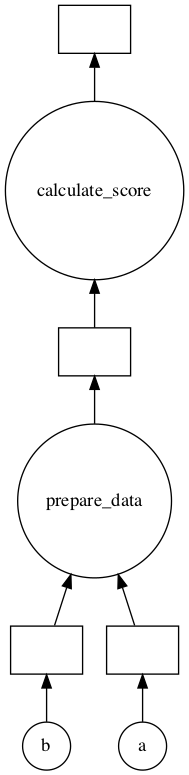

In [5]:
s.visualize()

Use `Experiment.set_parameters` method to set parameters for a trial. After setting parameters, `Parameter` variable and experiment result will be computable.

Parameters are recommended to be a scalar (or lightweight value) because these are stored as history (for example, passing filename as a parameter is　preffered rather than passing `DataFrame`).

In [6]:
ex.set_parameters(a=1, b=2)
a.compute()

2019-02-05 23:54:33,934 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=2<class 'int'>


1

In [7]:
s.compute()

2019-02-05 23:54:33,956 [daskperiment.core.trial] [INFO] Started Experiment (trial id=1)
2019-02-05 23:54:33,958 [daskperiment.core.experiment] [INFO] Target: calculate_score-d22eef69-9849-455c-8df2-19de504f3bea
2019-02-05 23:54:33,959 [daskperiment.core.trial] [INFO] Parameters: a=1<class 'int'>, b=2<class 'int'>
2019-02-05 23:54:33,962 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_1.py
2019-02-05 23:54:33,966 [daskperiment.core.environment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_1.txt
2019-02-05 23:54:33,969 [daskperiment.core.environment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirements_quickstart_pj_1.txt
2019-02-05 23:54:33,975 [daskperiment.core.trial] [INFO] Finished Experiment (trial id=1)
2019-02-05 23:54:33,979 [daskperiment.backend.local] [INFO] Saving Experiment to file: daskperiment_cache/quickstart_pj/quickstart_pj.pkl
20

3.3333333333333335

You can update any parameters for next trial. Every trials can be distinguished by trial id.

In [8]:
ex.set_parameters(b=3)
s.compute()

2019-02-05 23:54:34,008 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=3<class 'int'>
2019-02-05 23:54:34,010 [daskperiment.core.trial] [INFO] Started Experiment (trial id=2)
2019-02-05 23:54:34,013 [daskperiment.core.experiment] [INFO] Target: calculate_score-d22eef69-9849-455c-8df2-19de504f3bea
2019-02-05 23:54:34,014 [daskperiment.core.trial] [INFO] Parameters: a=1<class 'int'>, b=3<class 'int'>
2019-02-05 23:54:34,016 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_2.py
2019-02-05 23:54:34,018 [daskperiment.core.environment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_2.txt
2019-02-05 23:54:34,021 [daskperiment.core.environment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirements_quickstart_pj_2.txt
2019-02-05 23:54:34,026 [daskperiment.core.trial] [INFO] Finished Experiment (trial id=2)
2019-02-05 23:54:34,029 

2.5

After some trials, you can retrieve parameter values specifying trial id.

In [9]:
ex.get_parameters(trial_id=1)

{'a': 1, 'b': 2}

In [10]:
ex.get_parameters(trial_id=2)

{'a': 1, 'b': 3}

`Experiment.get_history` will return a `DataFrame` which stores a history of trial parameters and its results. You can select desirable trial using `pandas` basic operation.

In [11]:
ex.get_history()

,a,b,Result,Result Type,Success,Finished,Process Time,Description
Trial ID,,,,,,,,
1,1,2,3.333333,<class 'float'>,True,2019-02-05 23:54:33.975310,00:00:00.018878,NaN
2,1,3,2.500000,<class 'float'>,True,2019-02-05 23:54:34.026356,00:00:00.015565,NaN


When any error occurs during the trial, `Experiment` instance stores the log as failed trial. The "Description" column contains the error detail.

In [12]:
ex.set_parameters(a=1, b=-1)
try:
    s.compute()
    
except ZeroDivisionError as e:
    # To hide stack trace
    print('{}({})'.format(e.__class__.__name__, e))

2019-02-05 23:54:34,157 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=-1<class 'int'>
2019-02-05 23:54:34,167 [daskperiment.core.trial] [INFO] Started Experiment (trial id=3)
2019-02-05 23:54:34,169 [daskperiment.core.experiment] [INFO] Target: calculate_score-d22eef69-9849-455c-8df2-19de504f3bea
2019-02-05 23:54:34,173 [daskperiment.core.trial] [INFO] Parameters: a=1<class 'int'>, b=-1<class 'int'>
2019-02-05 23:54:34,175 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_3.py
2019-02-05 23:54:34,179 [daskperiment.core.environment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_3.txt
2019-02-05 23:54:34,186 [daskperiment.core.environment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirements_quickstart_pj_3.txt
2019-02-05 23:54:34,191 [daskperiment.core.experiment] [ERROR] Experiment failed: ZeroDivisionError(division by 

ZeroDivisionError(division by zero)


In [13]:
ex.get_history()

,a,b,Result,Result Type,Success,Finished,Process Time,Description
Trial ID,,,,,,,,
1,1,2,3.333333,<class 'float'>,True,2019-02-05 23:54:33.975310,00:00:00.018878,NaN
2,1,3,2.500000,<class 'float'>,True,2019-02-05 23:54:34.026356,00:00:00.015565,NaN
3,1,-1,NaN,None,False,2019-02-05 23:54:34.193423,00:00:00.026781,ZeroDivisionError(division by zero)


Every time the computation performed, `Experiment` instance is automatically saved to specified cache directory. When `Experiment` instance is initialized, it automatically load previous trials (check trial id in the log).

# Handling intermediate result

Next example shows how to retrieve an intermediate result of the chain.

The only difference is using `Experiment.persist` decorator. It makes `Experiment` instance to keep the decorated function's intermediate result. After definition, rebuilt the same workflow using the persisted function. 

Note that an intermediate result is saved as a pickle file named with its function name, function name must be unique in the experiment.

In [14]:
@ex.persist
def prepare_data(a, b):
    return a + b

d = prepare_data(a, b)
s = calculate_score(d)

2019-02-05 23:54:34,249 [daskperiment.core.code] [WARNING] Code context has been changed: prepare_data
2019-02-05 23:54:34,252 [daskperiment.core.code] [WARNING] @@ -1,3 +1,3 @@

2019-02-05 23:54:34,253 [daskperiment.core.code] [WARNING] -@ex
2019-02-05 23:54:34,254 [daskperiment.core.code] [WARNING] +@ex.persist
2019-02-05 23:54:34,255 [daskperiment.core.code] [WARNING]  def prepare_data(a, b):
2019-02-05 23:54:34,256 [daskperiment.core.code] [WARNING] -    return a + b 
2019-02-05 23:54:34,259 [daskperiment.core.code] [WARNING] +    return a + b


NOTE: Also, you can notice that `daskperiment` outputs some "WARNING" indicating code contexts has been changed. It's because `daskperiment` automatically tracks code context to guarantee reproducibility.

Let's perform some trials.

In [15]:
ex.set_parameters(a=1, b=2)
s.compute()

2019-02-05 23:54:34,266 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=2<class 'int'>
2019-02-05 23:54:34,269 [daskperiment.core.trial] [INFO] Started Experiment (trial id=4)
2019-02-05 23:54:34,271 [daskperiment.core.experiment] [INFO] Target: calculate_score-93afd804-bfaf-4211-890a-73705a70a20f
2019-02-05 23:54:34,272 [daskperiment.core.trial] [INFO] Parameters: a=1<class 'int'>, b=2<class 'int'>
2019-02-05 23:54:34,274 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_4.py
2019-02-05 23:54:34,276 [daskperiment.core.environment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_4.txt
2019-02-05 23:54:34,279 [daskperiment.core.environment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirements_quickstart_pj_4.txt
2019-02-05 23:54:34,283 [daskperiment.io.pickle] [INFO] Saving 3 to path=daskperiment_cache/quickstart_pj/persist/

3.3333333333333335

In [16]:
ex.set_parameters(a=3, b=2)
s.compute()

2019-02-05 23:54:34,304 [daskperiment.core.parameter] [INFO] Updated parameters: a=3<class 'int'>, b=2<class 'int'>
2019-02-05 23:54:34,311 [daskperiment.core.trial] [INFO] Started Experiment (trial id=5)
2019-02-05 23:54:34,312 [daskperiment.core.experiment] [INFO] Target: calculate_score-93afd804-bfaf-4211-890a-73705a70a20f
2019-02-05 23:54:34,314 [daskperiment.core.trial] [INFO] Parameters: a=3<class 'int'>, b=2<class 'int'>
2019-02-05 23:54:34,317 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_5.py
2019-02-05 23:54:34,321 [daskperiment.core.environment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_5.txt
2019-02-05 23:54:34,323 [daskperiment.core.environment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirements_quickstart_pj_5.txt
2019-02-05 23:54:34,328 [daskperiment.io.pickle] [INFO] Saving 5 to path=daskperiment_cache/quickstart_pj/persist/

2.0

You can retrieve intermediate results via `Experiment.get_persisted` method by specifying function name and trial id.

In [17]:
ex.get_persisted('prepare_data', trial_id=4)

2019-02-05 23:54:34,354 [daskperiment.io.pickle] [INFO] Loaded 3 from path=daskperiment_cache/quickstart_pj/persist/quickstart_pj_prepare_data_4.pkl


3

In [18]:
ex.get_persisted('prepare_data', trial_id=5)

2019-02-05 23:54:34,366 [daskperiment.io.pickle] [INFO] Loaded 5 from path=daskperiment_cache/quickstart_pj/persist/quickstart_pj_prepare_data_5.pkl


5

# Monitoring metrics

You may need to monitor transition of some metrics during each trial. In each experiment function, you can call `Experiment.save_metric` to save metric with its key (name) and epoch.

In [19]:
@ex.result
def calculate_score(s):
    for i in range(100):
        ex.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
        
    return 10 / s

d = prepare_data(a, b)
s = calculate_score(d)

2019-02-05 23:54:34,386 [daskperiment.core.code] [WARNING] Code context has been changed: calculate_score
2019-02-05 23:54:34,389 [daskperiment.core.code] [WARNING] @@ -1,3 +1,6 @@

2019-02-05 23:54:34,392 [daskperiment.core.code] [WARNING]  @ex.result
2019-02-05 23:54:34,394 [daskperiment.core.code] [WARNING]  def calculate_score(s):
2019-02-05 23:54:34,396 [daskperiment.core.code] [WARNING] +    for i in range(100):
2019-02-05 23:54:34,398 [daskperiment.core.code] [WARNING] +        ex.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
2019-02-05 23:54:34,399 [daskperiment.core.code] [WARNING] +        
2019-02-05 23:54:34,400 [daskperiment.core.code] [WARNING]      return 10 / s


In [20]:
ex.set_parameters(a=1, b=2)
s.compute()

2019-02-05 23:54:34,415 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=2<class 'int'>
2019-02-05 23:54:34,420 [daskperiment.core.trial] [INFO] Started Experiment (trial id=6)
2019-02-05 23:54:34,422 [daskperiment.core.experiment] [INFO] Target: calculate_score-4974fa9f-453d-43e3-a27c-5bc38d49c671
2019-02-05 23:54:34,424 [daskperiment.core.trial] [INFO] Parameters: a=1<class 'int'>, b=2<class 'int'>
2019-02-05 23:54:34,426 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_6.py
2019-02-05 23:54:34,429 [daskperiment.core.environment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_6.txt
2019-02-05 23:54:34,434 [daskperiment.core.environment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirements_quickstart_pj_6.txt
2019-02-05 23:54:34,440 [daskperiment.io.pickle] [INFO] Saving 3 to path=daskperiment_cache/quickstart_pj/persist/

3.3333333333333335

After a trial, you can load saved metric using `Experiment.load_metric` specifying its name and trial_id. As it is returned as `DataFrame`, you can easily investigate it.

In [21]:
dummy_score = ex.load_metric('dummy_score', trial_id=6)
print(dummy_score.head())

Trial ID           6
Epoch               
0         100.000000
1          99.149911
2          98.043988
3          99.180856
4          99.171569


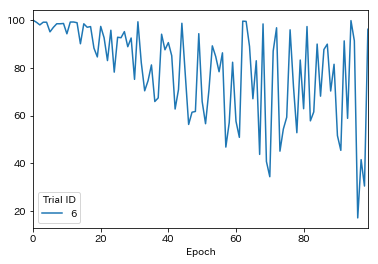

In [22]:
dummy_score.plot()

Perform another trial.

In [23]:
ex.set_parameters(a=3, b=4)
s.compute()

2019-02-05 23:54:34,955 [daskperiment.core.parameter] [INFO] Updated parameters: a=3<class 'int'>, b=4<class 'int'>
2019-02-05 23:54:34,958 [daskperiment.core.trial] [INFO] Started Experiment (trial id=7)
2019-02-05 23:54:34,960 [daskperiment.core.experiment] [INFO] Target: calculate_score-4974fa9f-453d-43e3-a27c-5bc38d49c671
2019-02-05 23:54:34,961 [daskperiment.core.trial] [INFO] Parameters: a=3<class 'int'>, b=4<class 'int'>
2019-02-05 23:54:34,962 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_7.py
2019-02-05 23:54:34,964 [daskperiment.core.environment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_7.txt
2019-02-05 23:54:34,968 [daskperiment.core.environment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirements_quickstart_pj_7.txt
2019-02-05 23:54:34,977 [daskperiment.io.pickle] [INFO] Saving 7 to path=daskperiment_cache/quickstart_pj/persist/

1.4285714285714286

To compare metrics between trials, pass multiple trial ids to `Experiment.load_metric`.

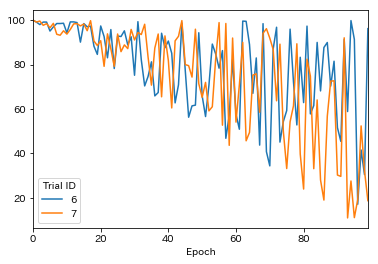

In [24]:
ex.load_metric('dummy_score', trial_id=[6, 7]).plot()

# Check code context

The above example illustrated `daskperiment` tracks code contexts decorated with `Experiment` decorators. 

To check the tracked code contexts, use `Experiment.get_code` specifying trial id (shows current code if trial id is not provided).

In [25]:
print(ex.get_code())

@ex.persist
def prepare_data(a, b):
    return a + b


@ex.result
def calculate_score(s):
    for i in range(100):
        ex.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
        
    return 10 / s



In [26]:
print(ex.get_code(trial_id=1))

@ex
def prepare_data(a, b):
    return a + b 


@ex.result
def calculate_score(s):
    return 10 / s



Each code context is also saved as a text file per trial id. Thus, these are easily handled by diff tools and  Git.

In [27]:
%cat daskperiment_cache/quickstart_pj/code/quickstart_pj_1.py

# Code output saved in trial_id=1
@ex
def prepare_data(a, b):
    return a + b 


@ex.result
def calculate_score(s):
    return 10 / s


# Save experiment result

`daskperiment` automatically saves its internal state when the experiment result is computed (when `.compute` is called). Also, `Experiment` instance automatically recover previous state when it is instanciated.

Following example instanciates `Experiment` instance using the same id as above. Thus, the created `Experiment` automatically recovers its state. 

In [28]:
ex_new = daskperiment.Experiment(id='quickstart_pj')

2019-02-05 23:54:35,500 [daskperiment.io.pickle] [INFO] Use existing cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/quickstart_pj
2019-02-05 23:54:35,514 [daskperiment.backend.local] [INFO] Loading Experiment from file: daskperiment_cache/quickstart_pj/quickstart_pj.pkl
2019-02-05 23:54:35,520 [daskperiment.io.pickle] [INFO] Loaded LocalBackend('daskperiment_cache/quickstart_pj') from path=daskperiment_cache/quickstart_pj/quickstart_pj.pkl
2019-02-05 23:54:35,522 [daskperiment.core.experiment] [INFO] Loaded existing experiment: Experiment(id: quickstart_pj, trial_id: 7, backend: LocalBackend('daskperiment_cache/quickstart_pj'))
2019-02-05 23:54:35,525 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-02-05 23:54:35,527 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (Jupyter Notebook)
2019-02-05 23:54:35,532 [daskperiment.core.environment] [INFO] daskperiment version: 0.2.1.dev0
2019-02-05 23:54:35,534 [dask

Calling `.get_history` returns information of previous trials.

In [29]:
ex_new.get_history()

,a,b,Result,Result Type,Success,Finished,Process Time,Description
Trial ID,,,,,,,,
1,1,2,3.333333,<class 'float'>,True,2019-02-05 23:54:33.975310,00:00:00.018878,NaN
2,1,3,2.500000,<class 'float'>,True,2019-02-05 23:54:34.026356,00:00:00.015565,NaN
3,1,-1,NaN,None,False,2019-02-05 23:54:34.193423,00:00:00.026781,ZeroDivisionError(division by zero)
4,1,2,3.333333,<class 'float'>,True,2019-02-05 23:54:34.286516,00:00:00.017472,NaN
5,3,2,2.000000,<class 'float'>,True,2019-02-05 23:54:34.335357,00:00:00.024314,NaN
6,1,2,3.333333,<class 'float'>,True,2019-02-05 23:54:34.443549,00:00:00.023008,NaN
7,3,4,1.428571,<class 'float'>,True,2019-02-05 23:54:34.987309,00:00:00.029193,NaN


Also, `Experiment` instance automatically detects the environment change from its previous trial. Following is a sample log when package update is detected (pandas 0.23.4 -> 0.24.0).

    2019-01-29 00:22:35,357 [daskperiment.io.serialize] [INFO] Loaded Experiment(id: quickstart_pj, trial_id: 14) from path=daskperiment_cache/quickstart_pj/quickstart_pj.pkl
    2019-01-29 00:22:35,404 [daskperiment.core.environment] [WARNING] Installed Python packages have been changed
    2019-01-29 00:22:35,408 [daskperiment.core.environment] [WARNING] @@ -142 +142 @@
    2019-01-29 00:22:35,411 [daskperiment.core.environment] [WARNING] -pandas 0.23.4 (/Users/sinhrks/anaconda/lib/python3.6/site-packages)
    2019-01-29 00:22:35,412 [daskperiment.core.environment] [WARNING] +pandas 0.24.0 (/Users/sinhrks/anaconda/lib/python3.6/site-packages)

# Run as CLI

`daskperiment` also supports execution from command line. First, prepare a `Python` script to define experiment. The usage of `Experiment` class is all the same as Jupyter example. `daskperiment` regards a result of a function decorated with `Experiment.result` (`calculate_score` function in below case) as experiment output.

In [30]:
%cat ../scripts/simple_experiment.py

import daskperiment

ex = daskperiment.Experiment(id='simple_experiment_pj')

a = ex.parameter('a')
b = ex.parameter('b')


@ex
def prepare_data(a, b):
    return a + b


@ex.result
def calculate_score(s):
    return s + 1


d = prepare_data(a, b)
calculate_score(d)


You can provide parameter values from command line options using `key=value` format. `daskperinemt` automatically parse parameters and perform computation.

In [31]:
!python ../scripts/simple_experiment.py a=1 b=2

2019-02-05 23:54:36,618 [daskperiment.io.pickle] [INFO] Creating new cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/simple_experiment_pj
2019-02-05 23:54:36,620 [daskperiment.core.experiment] [INFO] Initialized new experiment: Experiment(id: simple_experiment_pj, trial_id: 0, backend: LocalBackend('daskperiment_cache/simple_experiment_pj'))
2019-02-05 23:54:37,047 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-02-05 23:54:37,047 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (File)
2019-02-05 23:54:37,047 [daskperiment.core.environment] [INFO] daskperiment version: 0.2.1.dev0
2019-02-05 23:54:37,047 [daskperiment.core.environment] [INFO] daskperiment path: /Users/sinhrks/Git/daskperiment/daskperiment
2019-02-05 23:54:37,047 [daskperiment.core.environment] [INFO] Working directory: /Users/sinhrks/Git/daskperiment/notebook
2019-02-05 23:54:37,047 [daskperiment.core.environment] [INFO] Number of installed P

Let's perform multiple trials using different parameters. `daskperiment` automatically saves trial history as the same as Jupyter example (see trial id is incremented).

In [32]:
!python ../scripts/simple_experiment.py a=3 b=2

2019-02-05 23:54:38,358 [daskperiment.io.pickle] [INFO] Use existing cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/simple_experiment_pj
2019-02-05 23:54:38,360 [daskperiment.backend.local] [INFO] Loading Experiment from file: daskperiment_cache/simple_experiment_pj/simple_experiment_pj.pkl
2019-02-05 23:54:38,360 [daskperiment.io.pickle] [INFO] Loaded LocalBackend('daskperiment_cache/simple_experiment_pj') from path=daskperiment_cache/simple_experiment_pj/simple_experiment_pj.pkl
2019-02-05 23:54:38,360 [daskperiment.core.experiment] [INFO] Loaded existing experiment: Experiment(id: simple_experiment_pj, trial_id: 1, backend: LocalBackend('daskperiment_cache/simple_experiment_pj'))
2019-02-05 23:54:38,850 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-02-05 23:54:38,850 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (File)
2019-02-05 23:54:38,850 [daskperiment.core.environment] [INFO] daskperiment versi

To confirm the experiment results, instanciate Experiment specifying the same id as the script and use Experiment.get_history.

In [33]:
import daskperiment

ex = daskperiment.Experiment(id='simple_experiment_pj')
ex.get_history()

2019-02-05 23:54:39,219 [daskperiment.io.pickle] [INFO] Use existing cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/simple_experiment_pj
2019-02-05 23:54:39,222 [daskperiment.backend.local] [INFO] Loading Experiment from file: daskperiment_cache/simple_experiment_pj/simple_experiment_pj.pkl
2019-02-05 23:54:39,224 [daskperiment.io.pickle] [INFO] Loaded LocalBackend('daskperiment_cache/simple_experiment_pj') from path=daskperiment_cache/simple_experiment_pj/simple_experiment_pj.pkl
2019-02-05 23:54:39,226 [daskperiment.core.experiment] [INFO] Loaded existing experiment: Experiment(id: simple_experiment_pj, trial_id: 2, backend: LocalBackend('daskperiment_cache/simple_experiment_pj'))
2019-02-05 23:54:39,231 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-02-05 23:54:39,234 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (Jupyter Notebook)
2019-02-05 23:54:39,236 [daskperiment.core.environment] [INFO] daskpe

,a,b,Result,Result Type,Success,Finished,Process Time,Description
Trial ID,,,,,,,,
1,1,2,4,<class 'int'>,True,2019-02-05 23:54:37.068297,00:00:00.007780,NaN
2,3,2,6,<class 'int'>,True,2019-02-05 23:54:38.877678,00:00:00.013800,NaN
